## PD_MIT-CS1PD dataset

### Ground truth loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nqDataLoader as nq  #data loading library
from sklearn.model_selection import train_test_split
import h5py

### Load all the files

In [2]:
# load ground Ground Truth 
cs1PdFr = pd.read_csv( 'MIT-CS1PD/GT_DataPD_MIT-CS1PD.csv' )
# set Patient ID as index
cs1PdFr = cs1PdFr.set_index('pID')
# load ground Ground Truth 
cs2PdFr = pd.read_csv( 'MIT-CS2PD/GT_DataPD_MIT-CS2PD.csv' )
# set Patient ID as index
cs2PdFr = cs2PdFr.set_index('pID')
# show part of Data Frame
# cs2PdFr.head()

In [3]:
filenames = ['file_1', 'file_2']
patients = pd.DataFrame(columns=['id', 'hold', 'label'])
def load_all(record):
    global filenames, patients
    name = record.name
    
    arr = np.empty(shape=(0, 0))
    arr_press = np.empty(shape=(0, 0))
    arr_release = np.empty(shape=(0, 0))
    keyp = pd.Series()
    for filename in filenames:
        keyPressed, htArr, pressArr, releaseArr = \
                nq.getDataFiltHelper( 'MIT-CS1PD/data_MIT-CS1PD/' + cs1PdFr.loc[name][filename])
        arr = np.append(arr, htArr)
        arr_press = np.append(arr_press, pressArr)
        arr_release = np.append(arr_release, releaseArr)
        keyp = keyp.append(pd.Series(keyPressed))
        
    patients = patients.append({'id': name, 'hold': arr, 'key': keyp, 'label': record['gt'], 'press': arr_press, 
                               'release': arr_release}, ignore_index=True)
    
    return True

def load_all_d2(record):
    global patients
    filenames = ['file_1']
    name = record.name
    
    arr = np.empty(shape=(0, 0))
    arr_press = np.empty(shape=(0, 0))
    arr_release = np.empty(shape=(0, 0))
    keyp = pd.Series()
    for filename in filenames:
        keyPressed, htArr, pressArr, releaseArr = \
                nq.getDataFiltHelper( 'MIT-CS2PD/data_MIT-CS2PD/' + cs2PdFr.loc[name][filename])
        arr = np.append(arr, htArr)
        arr_press = np.append(arr_press, pressArr)
        arr_release = np.append(arr_release, releaseArr)
        keyp = keyp.append(pd.Series(keyPressed))
        
    patients = patients.append({'id': name, 'hold': arr, 'key': keyp, 'label': record['gt'], 'press': arr_press, 
                               'release': arr_release}, ignore_index=True)
    return True

def remove_quotes(row):    
    return list(row.apply(lambda x: x.replace('"', '')))
print(cs1PdFr)
    
tmp = cs1PdFr.apply(lambda x: load_all(x), axis=1)
tmp = cs2PdFr.apply(lambda x: load_all_d2(x), axis=1)

patients.set_index('id', inplace=True)
# print(patients['key'])
patients['key'] = patients['key'].apply(lambda x: remove_quotes(x))


        gt  updrs108   afTap    sTap   nqScore  typingSpeed  \
pID                                                           
11    True     14.25     NaN  162.25  0.117543   189.372549   
60   False      2.00     NaN  162.25  0.070350    60.533333   
67    True     25.25     NaN  133.75  0.223411    54.333333   
68   False      6.00     NaN  159.00  0.074973    71.800000   
70    True     26.25     NaN  113.50  0.175751    39.614035   
71    True     13.75  132.50  153.00  0.133368   106.274510   
72    True     17.00     NaN  146.75  0.212424    79.122807   
73    True     23.25   99.25  164.25  0.080307   115.541667   
74    True     11.25     NaN  175.50  0.107535   186.078431   
75    True     12.75   79.25  158.75  0.149056   176.117647   
76   False      0.00  136.75  177.00  0.086308   249.725490   
77   False      2.25     NaN  150.00  0.034513    79.733333   
78    True     39.25   49.50  191.75  0.273473    85.000000   
79   False      1.25  148.75  173.75  0.097358    82.52

C:\Users\Anony\anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Anony\Desktop\科研\ISEF\final\keyboard\code\nqDataLoader.py:87: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(fileIn, dtype=None, delimiter=',', skip_header=0)


TypeError: cannot use a string pattern on a bytes-like object

### Encoding A

In [6]:
import pandas as pf
file = pf.read_csv('/MIT-CS1PD/data_MIT-CS1PD/1402930351.011_001_014.csv')
print(file)

FileNotFoundError: [Errno 2] No such file or directory: '/MIT-CS1PD/data_MIT-CS1PD/1402930351.011_001_014.csv'

In [7]:
import pandas as pf
file = pf.read_csv('/home/qls/deep-learning-pd/MIT-CS1PD/data_MIT-CS1PD/1403706430.011_003_014.csv')
print(file)

FileNotFoundError: [Errno 2] No such file or directory: '/home/qls/deep-learning-pd/MIT-CS1PD/data_MIT-CS1PD/1403706430.011_003_014.csv'

In [8]:
frequency = 100  # Hz

In [9]:
print((patients.loc[11]).loc['hold'])
print(len((patients.loc[11]).loc['hold']))
print(len((patients.loc[11]).loc['press']))
print(len((patients.loc[11]).loc['release']))
print(len((patients.loc[11]).loc['key']))

print(type(patients.loc[11]))

patients.head()
patients[0:300]

KeyError: 11

In [10]:
print(patients['release'].shape[0])

KeyError: 'release'

### Encode all patients

In [27]:
'''code here returns
   the length of longest series (in seconds)
'''
# np.array(range(maxlen*freq)) / freq
def find_max(array):
    return array[-1]

max(patients['release'].apply(lambda x: find_max(x)))  # biggest release time value is 1747 seconds

1747.0699

In [28]:
print(patients)
patients['release'].apply(lambda x: find_max(x))

                                                   hold  label  \
id                                                               
11    [0.1713, 0.1432, 0.0655, 0.1188, 0.0737, 0.065...   True   
60    [0.0895, 0.0954, 0.1738, 0.1078, 0.166, 0.1361...  False   
67    [0.1119, 0.1345, 0.3396, 0.1883, 0.1592, 0.134...   True   
68    [0.1194, 0.1337, 0.1847, 0.1499, 0.2137, 0.164...  False   
70    [0.1528, 0.208, 0.2084, 0.1539, 0.177, 0.2055,...   True   
71    [0.1269, 0.1766, 0.1843, 0.1431, 0.1304, 0.165...   True   
72    [0.1516, 0.2453, 0.1762, 0.1335, 0.2223, 0.188...   True   
73    [0.0838, 0.0876, 0.0978, 0.0685, 0.0798, 0.093...   True   
74    [0.0557, 0.0758, 0.0704, 0.0663, 0.1005, 0.131...   True   
75    [0.1753, 0.1835, 0.1707, 0.1745, 0.1701, 0.165...   True   
76    [0.1428, 0.2186, 0.1533, 0.1742, 0.1528, 0.155...  False   
77    [0.0577, 0.066, 0.0654, 0.088, 0.0624, 0.065, ...  False   
78    [0.1342, 0.1804, 0.2044, 0.11, 0.1915, 0.1529,...   True   
79    [0.1

id
11       730.7326
60       903.2786
67       902.4525
68       897.5337
70       901.2972
71       720.5180
72       848.0759
73       716.2502
74       783.8720
75       735.8263
76       720.0517
77       836.5960
78       832.9249
79       772.9013
80       900.4417
81       914.4028
82       899.7408
83       720.4259
84       719.7033
85       719.0572
86       719.6321
87       720.3401
88      1369.5555
89       719.2559
92       779.0234
93       736.5128
94       724.0572
95       732.1182
97       719.3741
98       954.9213
          ...    
1029    1058.5370
1030     749.5397
1031     898.9592
1032     754.2737
1033     834.4995
1034     563.7208
1035    1492.2200
1037    1626.0199
1039     970.6623
1041     985.6684
1042     813.9858
1043    1036.4644
1045     789.2853
1047    1747.0699
1049     792.4535
1050     967.0875
1051    1059.8161
1052     724.9399
1053     981.0264
1055    1095.0365
1056     719.4929
1057    1041.6551
1059    1076.0264
1061     638.0487
1062   

In [29]:
frequency = 100  # Hz
maxlen = 1750  # this is now standard length for all the files (in seconds)
timestep = np.arange(start=0, stop=maxlen, step=np.float(1.0/frequency))
print(timestep)


[0.00000e+00 1.00000e-02 2.00000e-02 ... 1.74997e+03 1.74998e+03
 1.74999e+03]


In [31]:
# maxlen = 1750  # this is now standard length for all the files (in seconds)
# timestep = np.arange(start=0, stop=maxlen, step=np.float(1.0/frequency))

def encode(patient, freq=frequency):
    n_decimals = int(np.log10(freq))
    timestep = np.arange(start=0, stop=int(patient['release'][-1]), step=np.float(1.0/frequency))
#     print(timestep)
#     print(len(timestep))
    sample = np.zeros((timestep.shape[0], 1))
 
    patient['press'] = np.round_(patient['press'], decimals=n_decimals)
    patient['hold'] = np.round_(patient['hold'], decimals=n_decimals)
    patient['release'] = np.round_(patient['release'], decimals=n_decimals)
#     print(patient)

    
    for idx in range(patient['hold'].shape[0]):
        start = patient['press'][idx]
        finish = patient['release'][idx]
        
        size_of_insert = int(np.round_((finish - start) * freq, decimals=n_decimals))
#         print(size_of_insert)
        start_id = int(start * (10 ** n_decimals))
#         print(start_id)
        
        try:
            sample[start_id: start_id + size_of_insert] = np.ones((size_of_insert, 1))
#             print(sample)

        except:
            sample = np.concatenate((sample, np.zeros((start_id + size_of_insert - sample.shape[0], 1))))
            sample[start_id: start_id + size_of_insert] = np.ones((size_of_insert, 1))
    return {'encoded': sample, 'label': patient['label']}

def enc_table(table):
    
    return table.apply(lambda x: encode(x), axis=1)

# patients['encoded'] = patients.apply(lambda x: encode(x), axis=1)
# a = patients['encoded']

# print(a)
# print(patients['label'])
# print(patients)

# print(enc_table(patients))

X_train = pd.DataFrame(enc_table(patients))


# print(X_train)
# # print(X_train.loc[11])
# # print(type(X_train.loc[11]))

                  
X_train = X_train[0].apply(pd.Series)
X_train['label'] = X_train['label'].astype(int)

In [32]:
print(X_train.shape)
X_train.head()
print(X_train.head())
X_train
print(X_train['encoded'][74])
print(len(X_train['encoded'][74]))
# print(len(X_train['encoded'][60]))

(85, 2)
                                              encoded  label
id                                                          
11  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....      1
60  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....      0
67  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....      1
68  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....      0
70  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....      1
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
78387


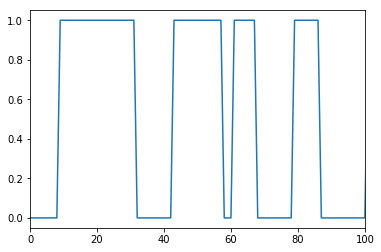

In [33]:
plt.plot(X_train['encoded'].iloc[0])
# np.log10(frequency)
plt.xlim((0, 100))
plt.show()

In [34]:
X_train['encoded'].iloc[8]
print(len(X_train['encoded'].iloc[1]))

90328


### Chunk time series

In [64]:
def chunk_one_patient(series, size, overlap):
    arr = np.array(chunk_array(series['encoded'], size, overlap))
    target = np.array([series['label'] for i in range(arr.shape[0])])
    return [arr, target]

def chunk_array(array, size, overlap):
#     print(array.shape)
    gen = gen_split_overlap(array, size, overlap)
    
    result = []
    for arr in gen:
        # if it's the last arr add zeros (if it's 0.7 of size)
        if arr.shape[0] != size:
            if np.float(arr.shape[0]) / np.float(size) >= 0.7:
                arr = np.concatenate((arr, np.zeros((size - arr.shape[0], 1))))
            else:
                continue
        
        result.append(arr)
#         print(arr.shape)
    return result
    

def gen_split_overlap(seq, size, overlap):
    if size < 1 or overlap < 0:
        raise ValueError('size must be >= 1 and overlap >= 0')

    for i in range(0, len(seq) - overlap, size - overlap):            
        yield seq[i: i + size]

In [85]:
chunk_size = 200  # number of data points in one chunk
overlap = 0.4     # overlapping between chunks in percents of chunk_size
overlap = int(overlap*chunk_size)

# one_patient = chunk_one_patient(X_train.iloc[0], chunk_size, overlap)
# one_patient = one_patient.transpose()
# one_patient.rename(columns={0: "data", 1: "part", 2: 'row', 3: 'target'})

res_df = pd.DataFrame()
res_df = X_train.apply(lambda x: chunk_one_patient(x, chunk_size, overlap), axis=1)
res_df = pd.DataFrame(res_df.apply(pd.Series))
res_df = res_df.rename(columns={0: "data", 1: "target"})
print(len(res_df['target'].iloc[76]))

867


In [84]:
# Concatenate rows all together
train_set = np.array((0, 0, 0))
target_set = np.array(0)

def concat_train(row):
    global train_set
    try: 
        train_set.shape[0]
        train_set = np.concatenate([train_set, row])
    except:
        train_set = row

def concat_target(row):
    global target_set
    try: 
        target_set.shape[0]
        target_set = np.concatenate([target_set, row])
    except:
        target_set = row

        
tmp = res_df['data'].apply(lambda x: concat_train(x))
tmp = res_df['target'].apply(lambda x: concat_target(x))


print('X_train shape', train_set.shape)
print('Y_train shape', target_set.shape)
print(len(res_df['target'].iloc[76]))

('X_train shape', (61696, 200, 1))
('Y_train shape', (61696,))
867


### Split training and testing instances

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=15)

NameError: name 'Y_train' is not defined

In [86]:
target_set = target_set.astype(int)
print(target_set)
print(len(target_set))

[1 1 1 ... 0 0 0]
61696


### Save data

In [28]:
h5f = h5py.File('encoding_A_freq{freq}_chunks{size}.h5'.format(freq=frequency, size=chunk_size), 'w')
h5f.create_dataset('train', data=train_set)
h5f.create_dataset('target', data=target_set)
h5f.close()